<a href="https://colab.research.google.com/github/unrebby/data/blob/main/homework_practice_07_boosting_Antonova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 13.12.2022

Мягкий дедлайн: 20.12.2022 23:59 MSK

Жёсткий дедлайн: 20.12.2022 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [6]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 1.56 s, sys: 4.19 ms, total: 1.57 s
Wall time: 1.59 s
Train ROC-AUC 0.9885
Valid ROC-AUC 0.9121
Test ROC-AUC 0.9193


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

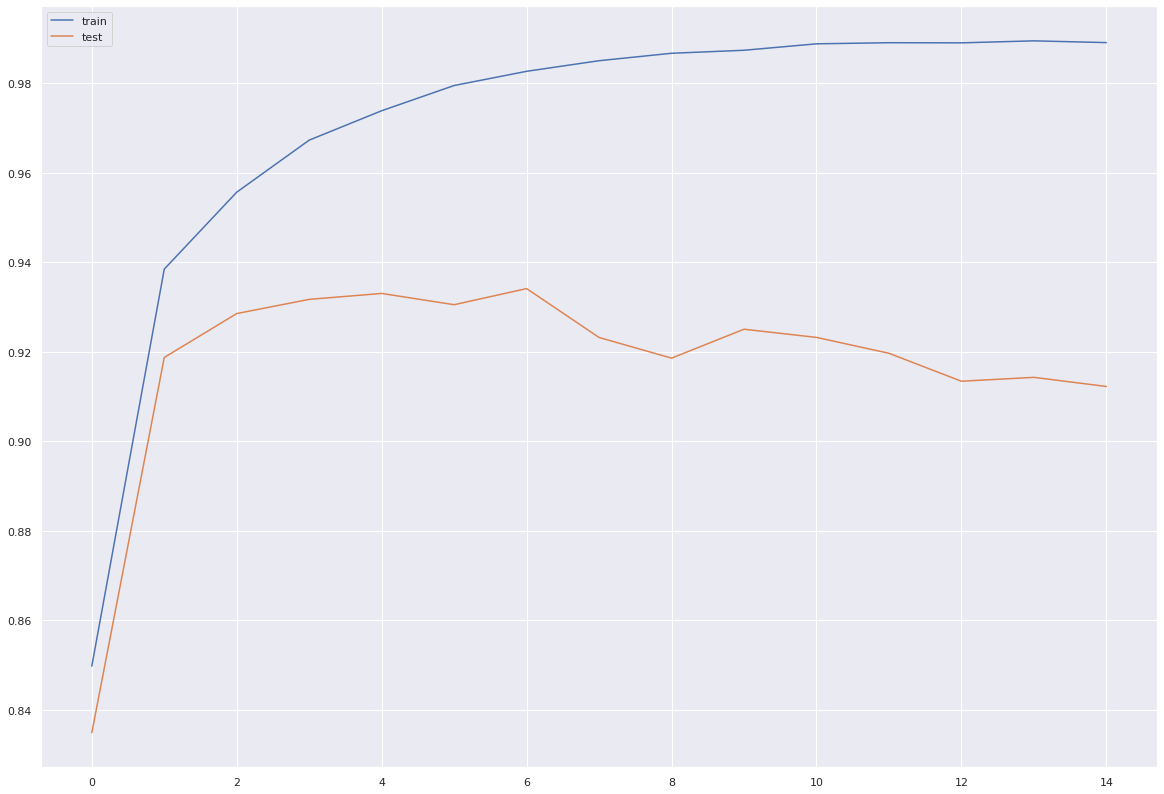

In [7]:
results = {'train' : [], 'test' : []}

depths = range(1, 30, 2)

for depth in depths:
    boosting = Boosting(base_model_params = {'max_depth': depth})
    boosting.fit(x_train, y_train, x_test, y_test)

    results['train'].append(boosting.score(x_train, y_train))
    results['test'].append(boosting.score(x_test, y_test))


plt.figure(figsize=(20,14))
plt.plot(results['train'], label='train')
plt.plot(results['test'], label='test')
plt.legend()
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Из графиков видно, что оптимальная глубина дерева лежит в интервале между 3 и 5.

Это не особо глубокие деревья. Так происходит из-за того, что глубокие деревья способны подстраиваться под обучающую выборку, а в таких случаях (когда базовые модели переобучаются) вся модель переобучается. Поэтому мы наблюдаем постоянный рост качества на трейне и некоторый рост и падение на валидационной выборке. 


## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

Для базовых моделей (деревьев) нам необходимо перебирать следующие параметры: max_depth, min_samples_leaf и min_samples_split.

Для бустинга: n_estimators, learning_rate и subsample.

За основу я взяла код [отсюда](http://zabaykin.ru/?p=600), чтоб понять, как работать с библиотекой.

In [8]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [13]:
def hyperopt_score(params):
    boosting = Boosting(**params)
    boosting.fit(x_train, y_train, x_test, y_test)
    score_ = boosting.score(x_valid, y_valid)
    print(score_, params)
    return -score_

In [28]:
parameters = {
            'base_model_params' : {
                'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
                'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 3, 4, 5]),
                'min_samples_split': hp.choice('min_samples_split', [1.0, 10, 20])
            },
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
            'learning_rate': hp.quniform('learning_rate', 0.1, 0.6, 0.05)
        }
 
best_ = fmin(fn=hyperopt_score, space=parameters, algo=tpe.suggest, max_evals=10)
print('best:')
print(best_)

0.9432442312742401
{'base_model_params': {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 20}, 'learning_rate': 0.15000000000000002, 'n_estimators': 247, 'subsample': 0.75}
0.9399325368983736
{'base_model_params': {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 20}, 'learning_rate': 0.2, 'n_estimators': 209, 'subsample': 0.75}
0.9401831688660818
{'base_model_params': {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 10}, 'learning_rate': 0.4, 'n_estimators': 909, 'subsample': 0.65}
0.9389391882238095
{'base_model_params': {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 1.0}, 'learning_rate': 0.45, 'n_estimators': 364, 'subsample': 0.5}
0.9414191675985546
{'base_model_params': {'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 20}, 'learning_rate': 0.25, 'n_estimators': 937, 'subsample': 0.6000000000000001}
0.9445189422692409
{'base_model_params': {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 20}, 'learning_rate

Сохраним результаты:


In [29]:
model_best = {
      'base_model_params' : {
          'max_depth': best_['max_depth'],
          'min_samples_leaf': best_['min_samples_leaf'],
          'min_samples_split':  best_['min_samples_split']
      },
      'n_estimators': best_['n_estimators'],
      'subsample': best_['subsample'],
      'learning_rate': best_['learning_rate']
}

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

Тут я взяла за основу код с [семинара](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem06-calibration.ipynb).

In [30]:
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression

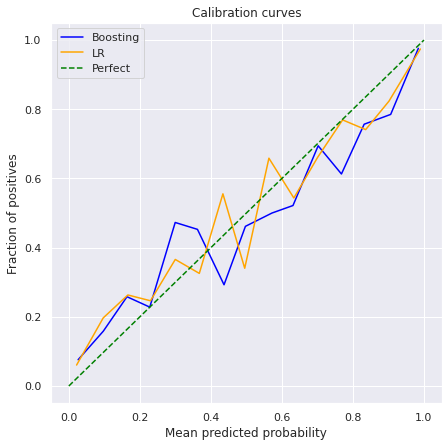

In [31]:
plt.figure(figsize=(7, 7))

bst_ = Boosting(**model_best)
bst_.fit(x_train, y_train, x_valid, y_valid)
bst_pred = bst_.predict_proba(x_test)[:, 1]

lr = LogisticRegression(max_iter=100000).fit(x_train, y_train)
lr_pred = lr.predict_proba(x_test)[:, 1]

bst_true_prob, bst_pred_prob = calibration_curve(y_test, bst_pred, n_bins=15)
lr_true_prob, lr_pred_prob = calibration_curve(y_test, lr_pred, n_bins=15)

plt.plot(bst_pred_prob, bst_true_prob, label='Boosting', color='blue')
plt.plot(lr_pred_prob, lr_true_prob, label='LR', color='orange')
plt.plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='green')

plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curves')
plt.legend()
plt.show()

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

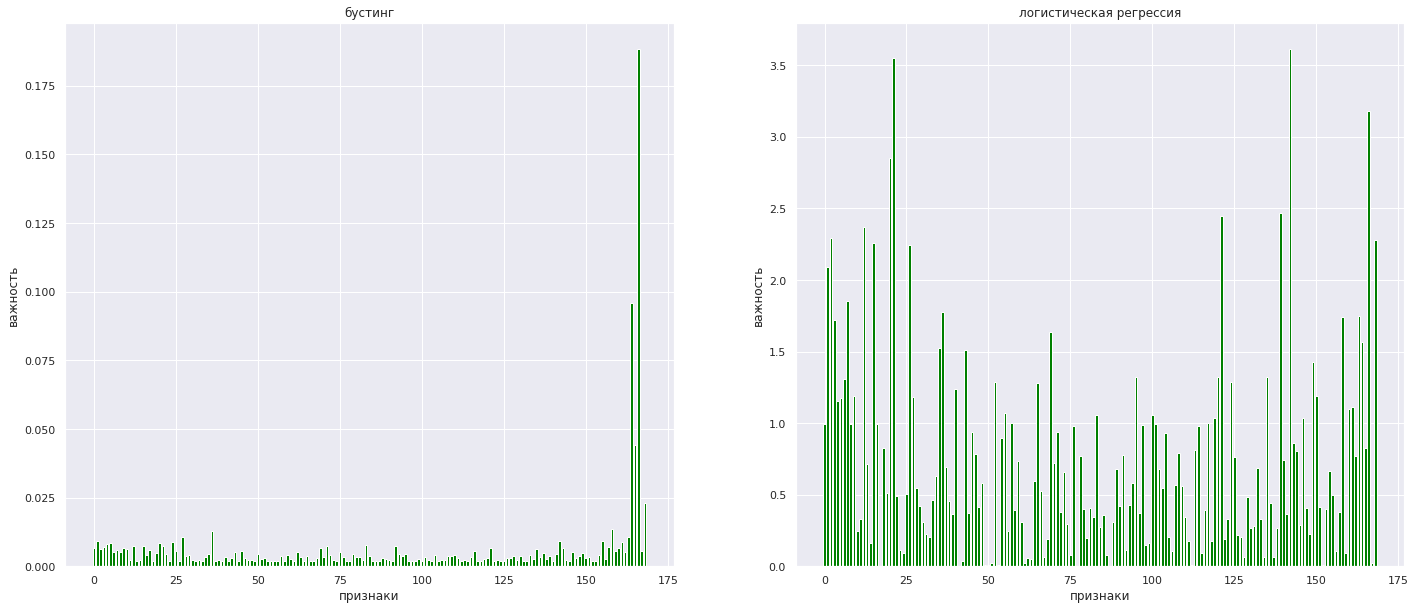

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(24, 10))

ax[0].bar(np.arange(x_train.shape[1]), bst_.feature_importances_, color='green')
ax[0].set_xlabel('признаки')
ax[0].set_ylabel('важность')
ax[0].set_title('бустинг')

ax[1].bar(np.arange(x_train.shape[1]), abs(lr.coef_[0]), color='green')
ax[1].set_xlabel('признаки')
ax[1].set_ylabel('важность')
ax[1].set_title('логистическая регрессия')

plt.show()

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [33]:
boosting = Boosting(**model_best)
boosting.fit(x_train, y_train, x_test, y_test)
print('score with all features:', boosting.score(x_valid, y_valid))

score with all features: 0.9438827840582105


In [34]:
inds_ = []
for i in range(len(boosting.feature_importances_)):
  if boosting.feature_importances_[i] > 0.01:
    inds_.append(i)

In [35]:
boosting2 = Boosting(**model_best)
boosting2.fit(x_train[:, inds_], y_train, x_valid[:, inds_], y_valid)
print(boosting2.score(x_test[:, inds_], y_test))

0.9346406129206469


In [36]:
inds_ = []
for i in range(len(boosting.feature_importances_)):
  if boosting.feature_importances_[i] > 0.005:
    inds_.append(i)

In [37]:
boosting2 = Boosting(**model_best)
boosting2.fit(x_train[:, inds_], y_train, x_valid[:, inds_], y_valid)
print(boosting2.score(x_test[:, inds_], y_test))

0.9399262032708624


In [38]:
inds_ = []
for i in range(len(boosting.feature_importances_)):
  if boosting.feature_importances_[i] > 0.001:
    inds_.append(i)

In [39]:
boosting2 = Boosting(**model_best)
boosting2.fit(x_train[:, inds_], y_train, x_valid[:, inds_], y_valid)
print(boosting2.score(x_test[:, inds_], y_test))

0.9414491366239297


Я перебрала несколько вариантов, улучшения не удалось добиться.

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

Для написания это задания я использовала как основу код [отсюда](https://temofeev.ru/info/articles/mashinnoe-obuchenie-ansambl-smeshivaniya-na-python/).

In [65]:
meta_X = list()
boosting = Boosting(**model_best)
boosting.fit(x_train, y_train, x_valid, y_valid)

yhat = boosting.predict_proba(x_valid)[:, 1]
yhat = yhat.reshape(len(yhat), 1)
meta_X.append(yhat)

meta_X = np.hstack(meta_X)

blender = LogisticRegression()
blender.fit(meta_X, y_valid)

meta_X = list()
yhat = boosting.predict_proba(x_test)[:, 1]
yhat = yhat.reshape(len(yhat), 1)
meta_X.append(yhat)
meta_X = np.hstack(meta_X)
res_pred = blender.predict(meta_X)

score = roc_auc_score(y_test, res_pred)

In [66]:
print(score)

0.8527915065270821


Качество не улучшилось (оказалось даже ниже, чем мы получали до этого).

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [40]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [41]:
pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.5 MB/s 


In [42]:
from catboost import CatBoost, Pool, CatBoostClassifier
from sklearn.metrics import roc_auc_score

In [50]:
train_data = x_train

train_labels = y_train

test_data = catboost_pool = Pool(x_test, 
                                 y_test)

model = CatBoostClassifier(iterations=2,
                           max_depth=best_['max_depth'],
                           learning_rate=best_['learning_rate'],
                           subsample=best_['subsample'])

model.fit(train_data, train_labels)
preds_class = model.predict(test_data)

print('score with CatBoostClassifier: ', roc_auc_score(preds_class, y_test))

0:	learn: 0.3901205	total: 12.4ms	remaining: 12.4ms
1:	learn: 0.3363881	total: 25.7ms	remaining: 0us
score with CatBoostClassifier:  0.824378453038674


Качество на наших данных с нашей моделью также получилось лучше.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2023 года?

От нового года хочется легкой учебы и больше сна, чтоб эта ёлочка не увеличивалась в размерах.

In [71]:
from IPython.display import Image
from google.colab import files

png1 = files.upload()
png2 = files.upload()

Saving ёлочка.jpg to ёлочка.jpg


Saving ёлочка2.jpg to ёлочка2.jpg


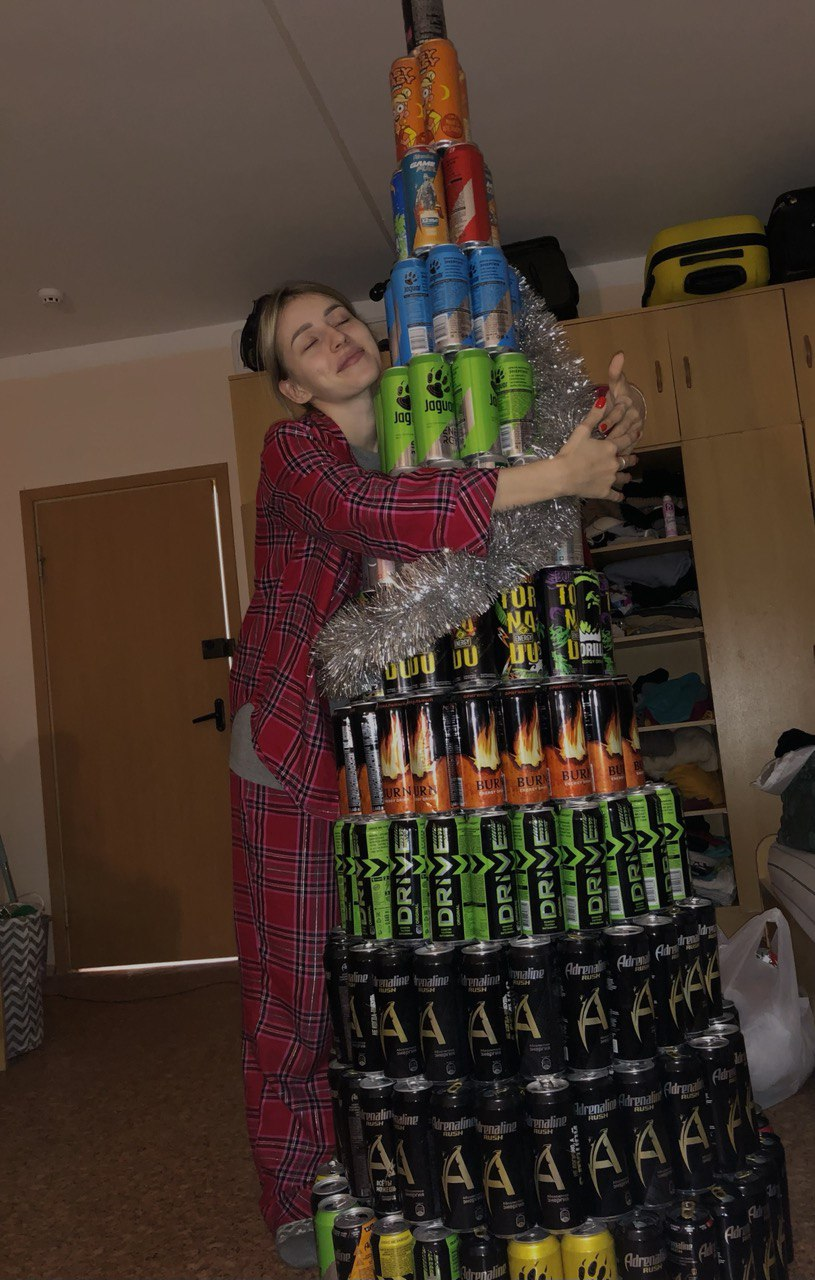

In [73]:
Image('ёлочка.jpg', height = 1000)

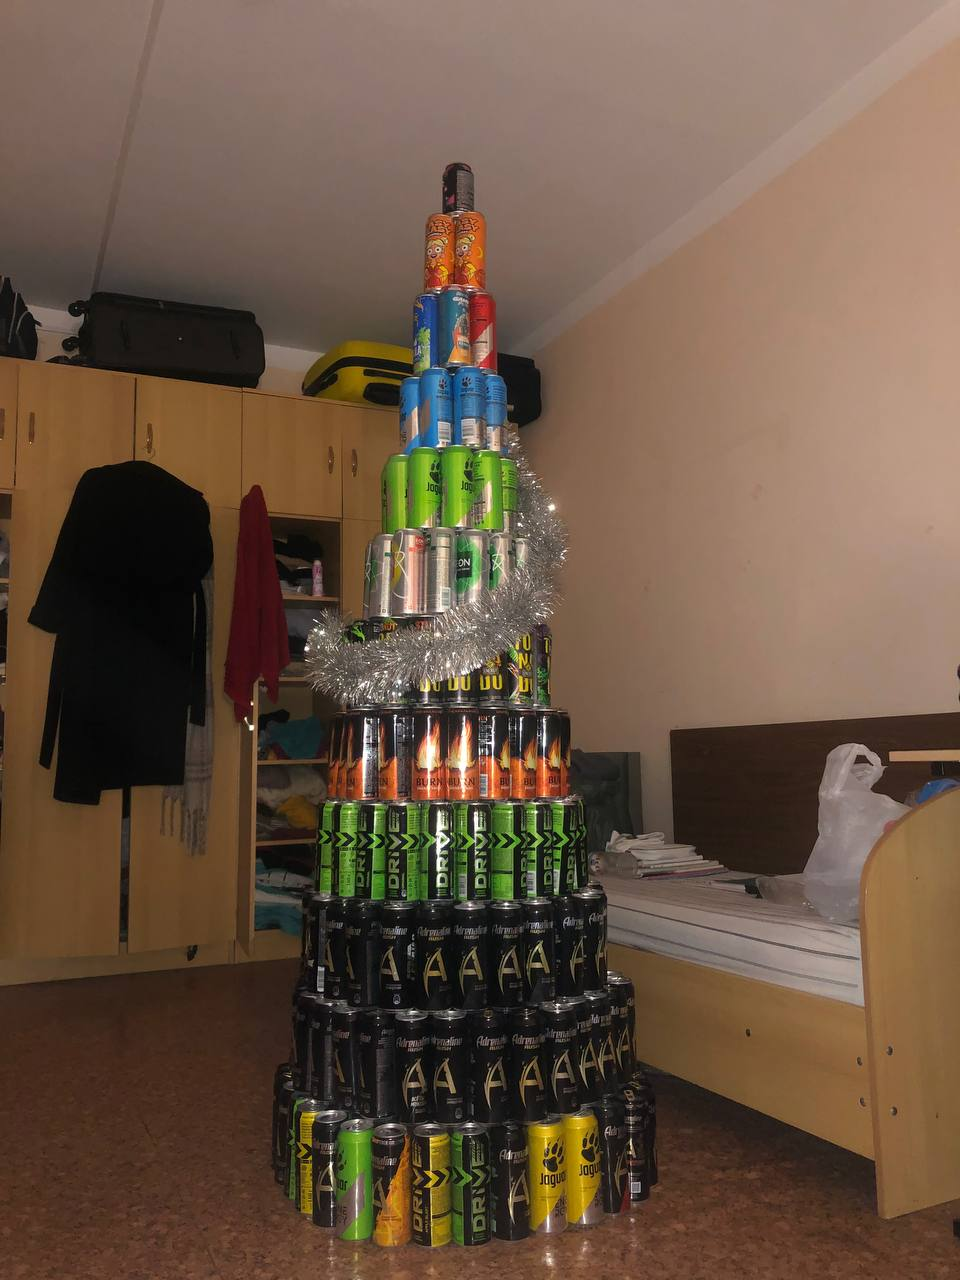

In [74]:
Image('ёлочка2.jpg', height = 1000)